In [78]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import load_boston
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import scale
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn import set_config 
import joblib
import plotly.io as pio
pio.renderers.default = 'jupyterlab'
 

In [79]:
new_data1 = joblib.load('new_data1.joblib')
new_data1.head(3)

,BuildingType,PrimaryPropertyType,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),TotalGHGEmissions
0,NonResidential,Hotel,downtown,47.61220,-122.33799,1927,1.0,12,88434,7226362.5,2003882.0,3946027.0,1276453.0,249.98
1,NonResidential,Hotel,downtown,47.61317,-122.33393,1996,1.0,11,103566,8387933.0,0.0,3242851.0,5145082.0,295.86
2,NonResidential,Hotel,downtown,47.61393,-122.33810,1969,1.0,41,956110,72587024.0,21566554.0,49526664.0,1493800.0,2089.28


In [80]:
# one-hot-encoding
def get_ohe(df, column_name):
    ohe = OneHotEncoder(sparse=False)
    ohe.fit(df[[column_name]])
    temp_df = pd.DataFrame(data=ohe.transform(df[[column_name]]), columns=ohe.get_feature_names_out())
    df.drop(columns=[column_name], axis=1, inplace=True)
    df = pd.concat([df.reset_index(drop=True), temp_df], axis=1)
    return df

new_data1 = get_ohe(new_data1, 'BuildingType')
new_data1 = get_ohe(new_data1, 'PrimaryPropertyType')
new_data1 = get_ohe(new_data1, 'Neighborhood')

## Total GHG Emissions

In [81]:
y = new_data1[['TotalGHGEmissions']]

#Je sélectionne toutes les colonnes sauf la dernière (qui est ma cible) pour les mettre dans la variable X
X = new_data1.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], axis=1)

In [82]:
X.columns

Index(['Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'BuildingType_Campus',
       'BuildingType_NonResidential', 'BuildingType_Nonresidential COS',
       'BuildingType_Nonresidential WA', 'BuildingType_SPS-District K-12',
       'PrimaryPropertyType_Distribution Center',
       'PrimaryPropertyType_Hospital', 'PrimaryPropertyType_Hotel',
       'PrimaryPropertyType_K-12 School', 'PrimaryPropertyType_Laboratory',
       'PrimaryPropertyType_Large Office',
       'PrimaryPropertyType_Low-Rise Multifamily',
       'PrimaryPropertyType_Medical Office',
       'PrimaryPropertyType_Mixed Use Property', 'PrimaryPropertyType_Office',
       'PrimaryPropertyType_Other',
       'PrimaryPropertyType_Refrigerated Warehouse',
       'PrimaryPropertyType_Residence Hall', 'PrimaryPropertyType_Restaurant',
       'PrimaryPropertyType_Retail Store',
       'PrimaryPropertyType_Self-Storage Facility',
       'PrimaryPropertyType_Senior Care Com

In [83]:
std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.25)

In [84]:
set_config(print_changed_only=False) 
 
rfr = RandomForestRegressor(criterion='absolute_error', n_estimators=150)
print(rfr)
# paramètre par défaut#
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='absolute_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='absolute_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='absolute_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [85]:
rfr.fit(X_train, y_train)

score = rfr.score(X_train, y_train)
print("R-squared:", score) 


/var/folders/69/znpdjyyn30132q0xzrckg4fh0000gn/T/ipykernel_4317/1305421273.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R-squared: 0.9254671771504409


In [86]:
ypred = rfr.predict(X_test)

mse = mean_squared_error(y_test, ypred)
mae = mean_absolute_error(y_test, ypred)
mape = mean_absolute_percentage_error(y_test, ypred)
print("MSE: ", mse)
print("RMSE: ", mse*(1/2.0))
print("MAE: ", mae)
print("mape: ", mape)

MSE:  171239.60232992907
RMSE:  85619.80116496453
MAE:  140.8316651478817
mape:  1.2173599152751894e+16


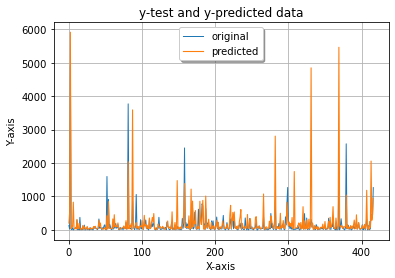

In [87]:
# visualize the original and predicted data in a plot.
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, ypred, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


In [88]:
# L’analyse de l’importance des variables permet d'un gain de rapidité de temps de calcul et comprendre les variables

from sklearn.feature_selection import SelectFromModel
from sklearn.inspection import permutation_importance
import timeit

select = SelectFromModel(rfr, prefit=True, threshold=0.003)
X_train2 = select.transform(X_train)
print(X_train2.shape)

rfc2 = RandomForestRegressor(n_estimators=150, oob_score=True)
start_time = timeit.default_timer()

rfc2 = rfc2.fit(X_train2, y_train)

X_test2 = select.transform(X_test)

pred_rfr2 = rfc2.predict(X_test2)
elapsed = timeit.default_timer() - start_time
print(elapsed)

(1249, 29)


/var/folders/69/znpdjyyn30132q0xzrckg4fh0000gn/T/ipykernel_4317/1021875712.py:14: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



2.6969121470028767


Text(0.5, 0, 'Feature Importance')

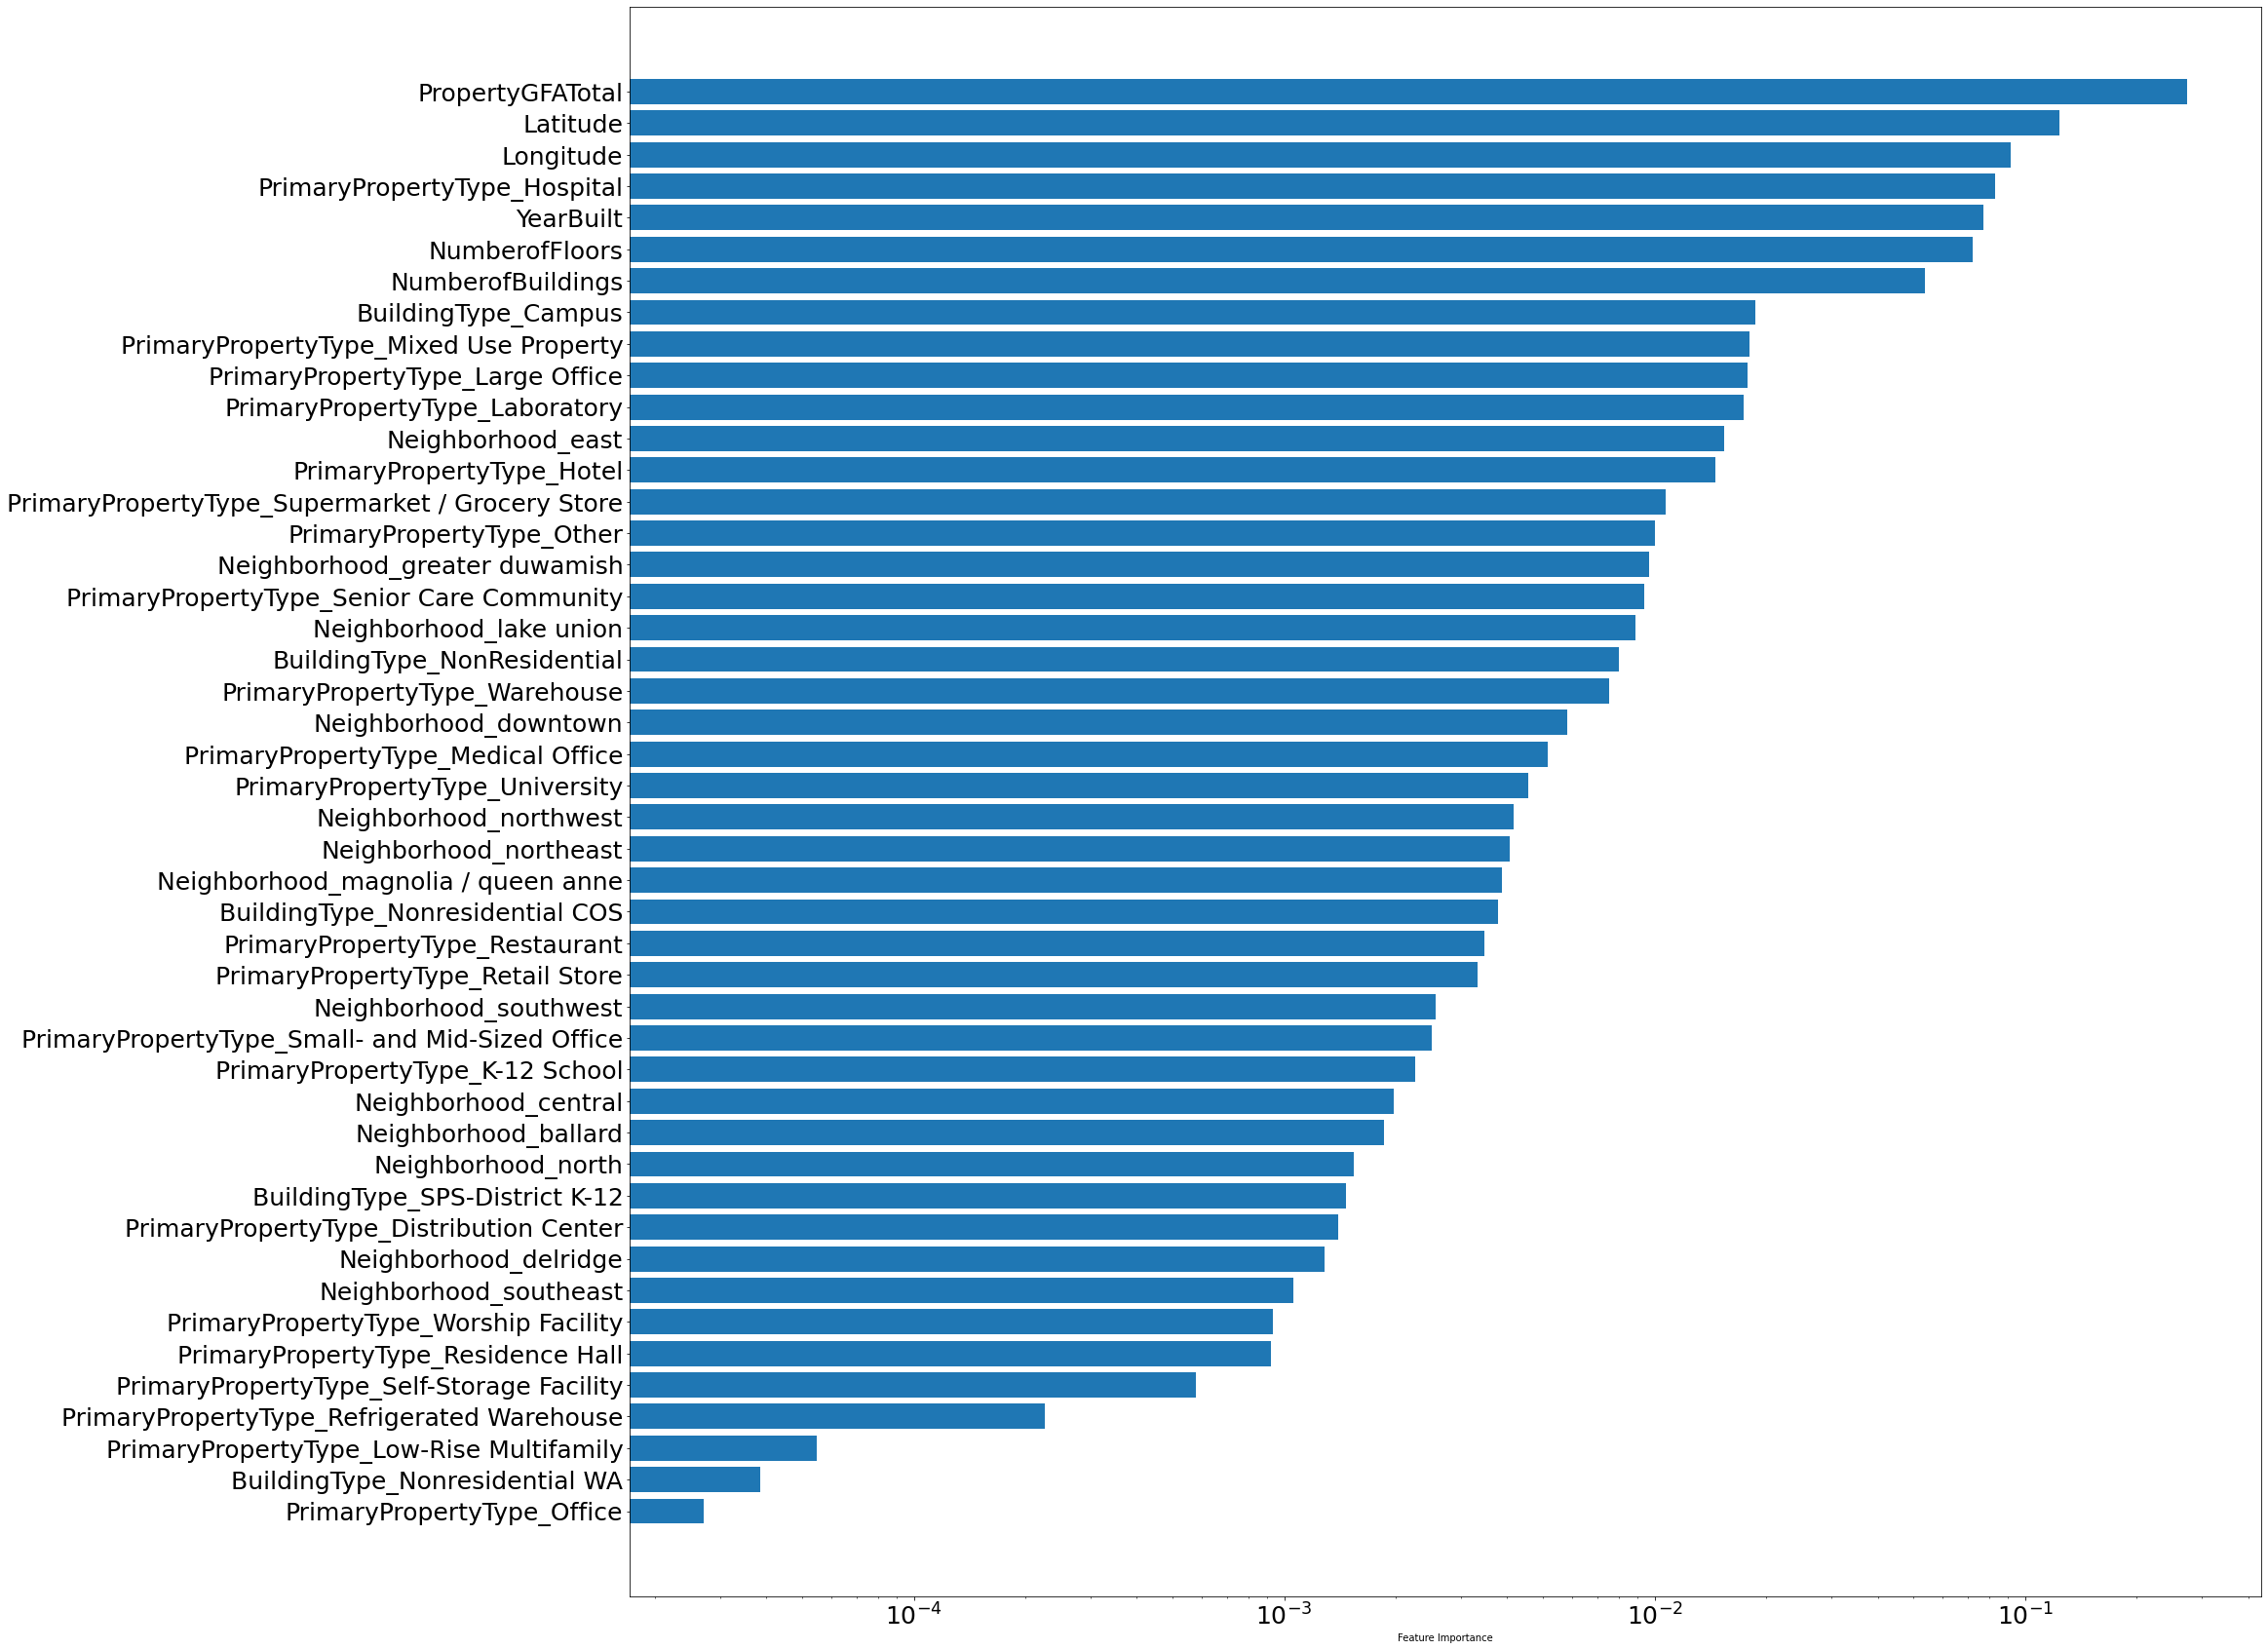

In [89]:
# feature importance
plt.figure(figsize=(30,30))
plt.yticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize=25 
)
plt.xscale('log')
plt.xticks(
        rotation=0, 
        fontweight='light',
        fontsize=25
)

sort = rfr.feature_importances_.argsort()
figure = plt.barh(X.columns[sort], rfr.feature_importances_[sort])
plt.xlabel("Feature Importance")




In [90]:
max_features_range  = ['sqrt', 'log2']
max_depth_range = [25, 50, 75]
min_samples_split_range = [2, 5, 10]
bootstrap_range = [True, False]
n_estimators_range = [100, 150, 200]
min_samples_leaf_range = [1,2,5,10]

param_rfr = {'max_features' : max_features_range,
             'max_depth': max_depth_range,
             'min_samples_split': min_samples_split_range,
             'bootstrap' : bootstrap_range,
             'min_samples_leaf': min_samples_leaf_range,
             'n_estimators' : n_estimators_range
             }


In [91]:

score = 'neg_mean_absolute_error'

grid_pred = GridSearchCV(RandomForestRegressor(criterion='absolute_error'),
        param_grid=param_rfr,
        cv=5,
        scoring=score)
                                    
grid_pred.fit(X_train, y_train)



/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='absolute_error',
                                             max_depth=None, max_features=1.0,
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             n_jobs=None,
             param_grid={'bootstrap': [True, False], 'max_depth': [25, 50, 75],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 150, 200]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [92]:
best_grid = grid_pred.best_estimator_
y_test_pred_cv = best_grid.predict(X_test)


In [93]:
best_grid

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                      criterion='absolute_error', max_depth=75,
                      max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=150,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [94]:


mae_cv = mean_absolute_error(y_test, y_test_pred_cv)
mse_cv = mean_squared_error(y_test, y_test_pred_cv)
mape_cv = mean_absolute_percentage_error(y_test, y_test_pred_cv)
r2_cv = r2_score(y_test,y_test_pred_cv)

In [95]:
grid_pred.best_params_

{'bootstrap': False,
 'max_depth': 75,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 150}

In [96]:
print("MAE_cv : " , mae_cv)
print("MSE_cv : ", mse_cv)
print("MAPE_cv : ", mape_cv)
print("R2_cv : ", r2_cv)


MAE_cv :  104.34062334132693
MSE_cv :  72040.74764099452
MAPE_cv :  1.3802081338010666e+16
R2_cv :  0.5344543999153071


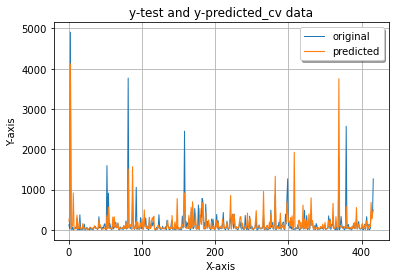

In [98]:
x_ax = range(len(y_test))
plt.plot(x_ax, y_test, linewidth=1, label="original")
plt.plot(x_ax, y_test_pred_cv, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted_cv data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

## Site Energy Use (kBtu)

In [120]:
y2 = new_data1[['SiteEnergyUse(kBtu)']]
X2 = new_data1.drop(['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SteamUse(kBtu)', 'Electricity(kBtu)', 'NaturalGas(kBtu)'], axis=1)
std_scale2 = preprocessing.StandardScaler().fit(X2)
X_std2 = std_scale2.transform(X2)

X_train, X_test, y_train, y_test = train_test_split(X_std2, y2, test_size=0.25)


In [122]:
set_config(print_changed_only=False) 
 
rfr2 = RandomForestRegressor(criterion='absolute_error')
print(rfr2)
 
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='absolute_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False) 

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='absolute_error',
                      max_depth=None, max_features=1.0, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='absolute_error',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [123]:
rfr2.fit(X_train, y_train)

score2 = rfr2.score(X_train, y_train)
print("R-squared:", score2) 


/var/folders/69/znpdjyyn30132q0xzrckg4fh0000gn/T/ipykernel_4317/1932536923.py:1: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



R-squared: 0.9170582098552582


In [124]:
ypred2 = rfr2.predict(X_test)

mse2 = mean_squared_error(y_test, ypred2)
mae2 = mean_absolute_error(y_test, ypred2)
mape2 = mean_absolute_percentage_error(y_test, ypred2)
print("MSE: ", mse2)
print("RMSE: ", mse2*(1/2.0)) 
print("MAE: ", mae2)
print("mape: ", mape2)


MSE:  144083295780129.53
RMSE:  72041647890064.77
MAE:  3939516.5492768837
mape:  2.118671558694133e+20


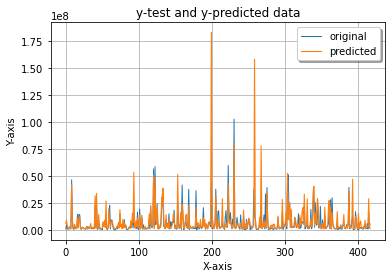

In [125]:
# visualize the original and predicted data in a plot.
x_a2 = range(len(y_test))
plt.plot(x_a2, y_test, linewidth=1, label="original")
plt.plot(x_a2, ypred2, linewidth=1.1, label="predicted")
plt.title("y-test and y-predicted data")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 


Text(0.5, 0, 'Feature Importance')

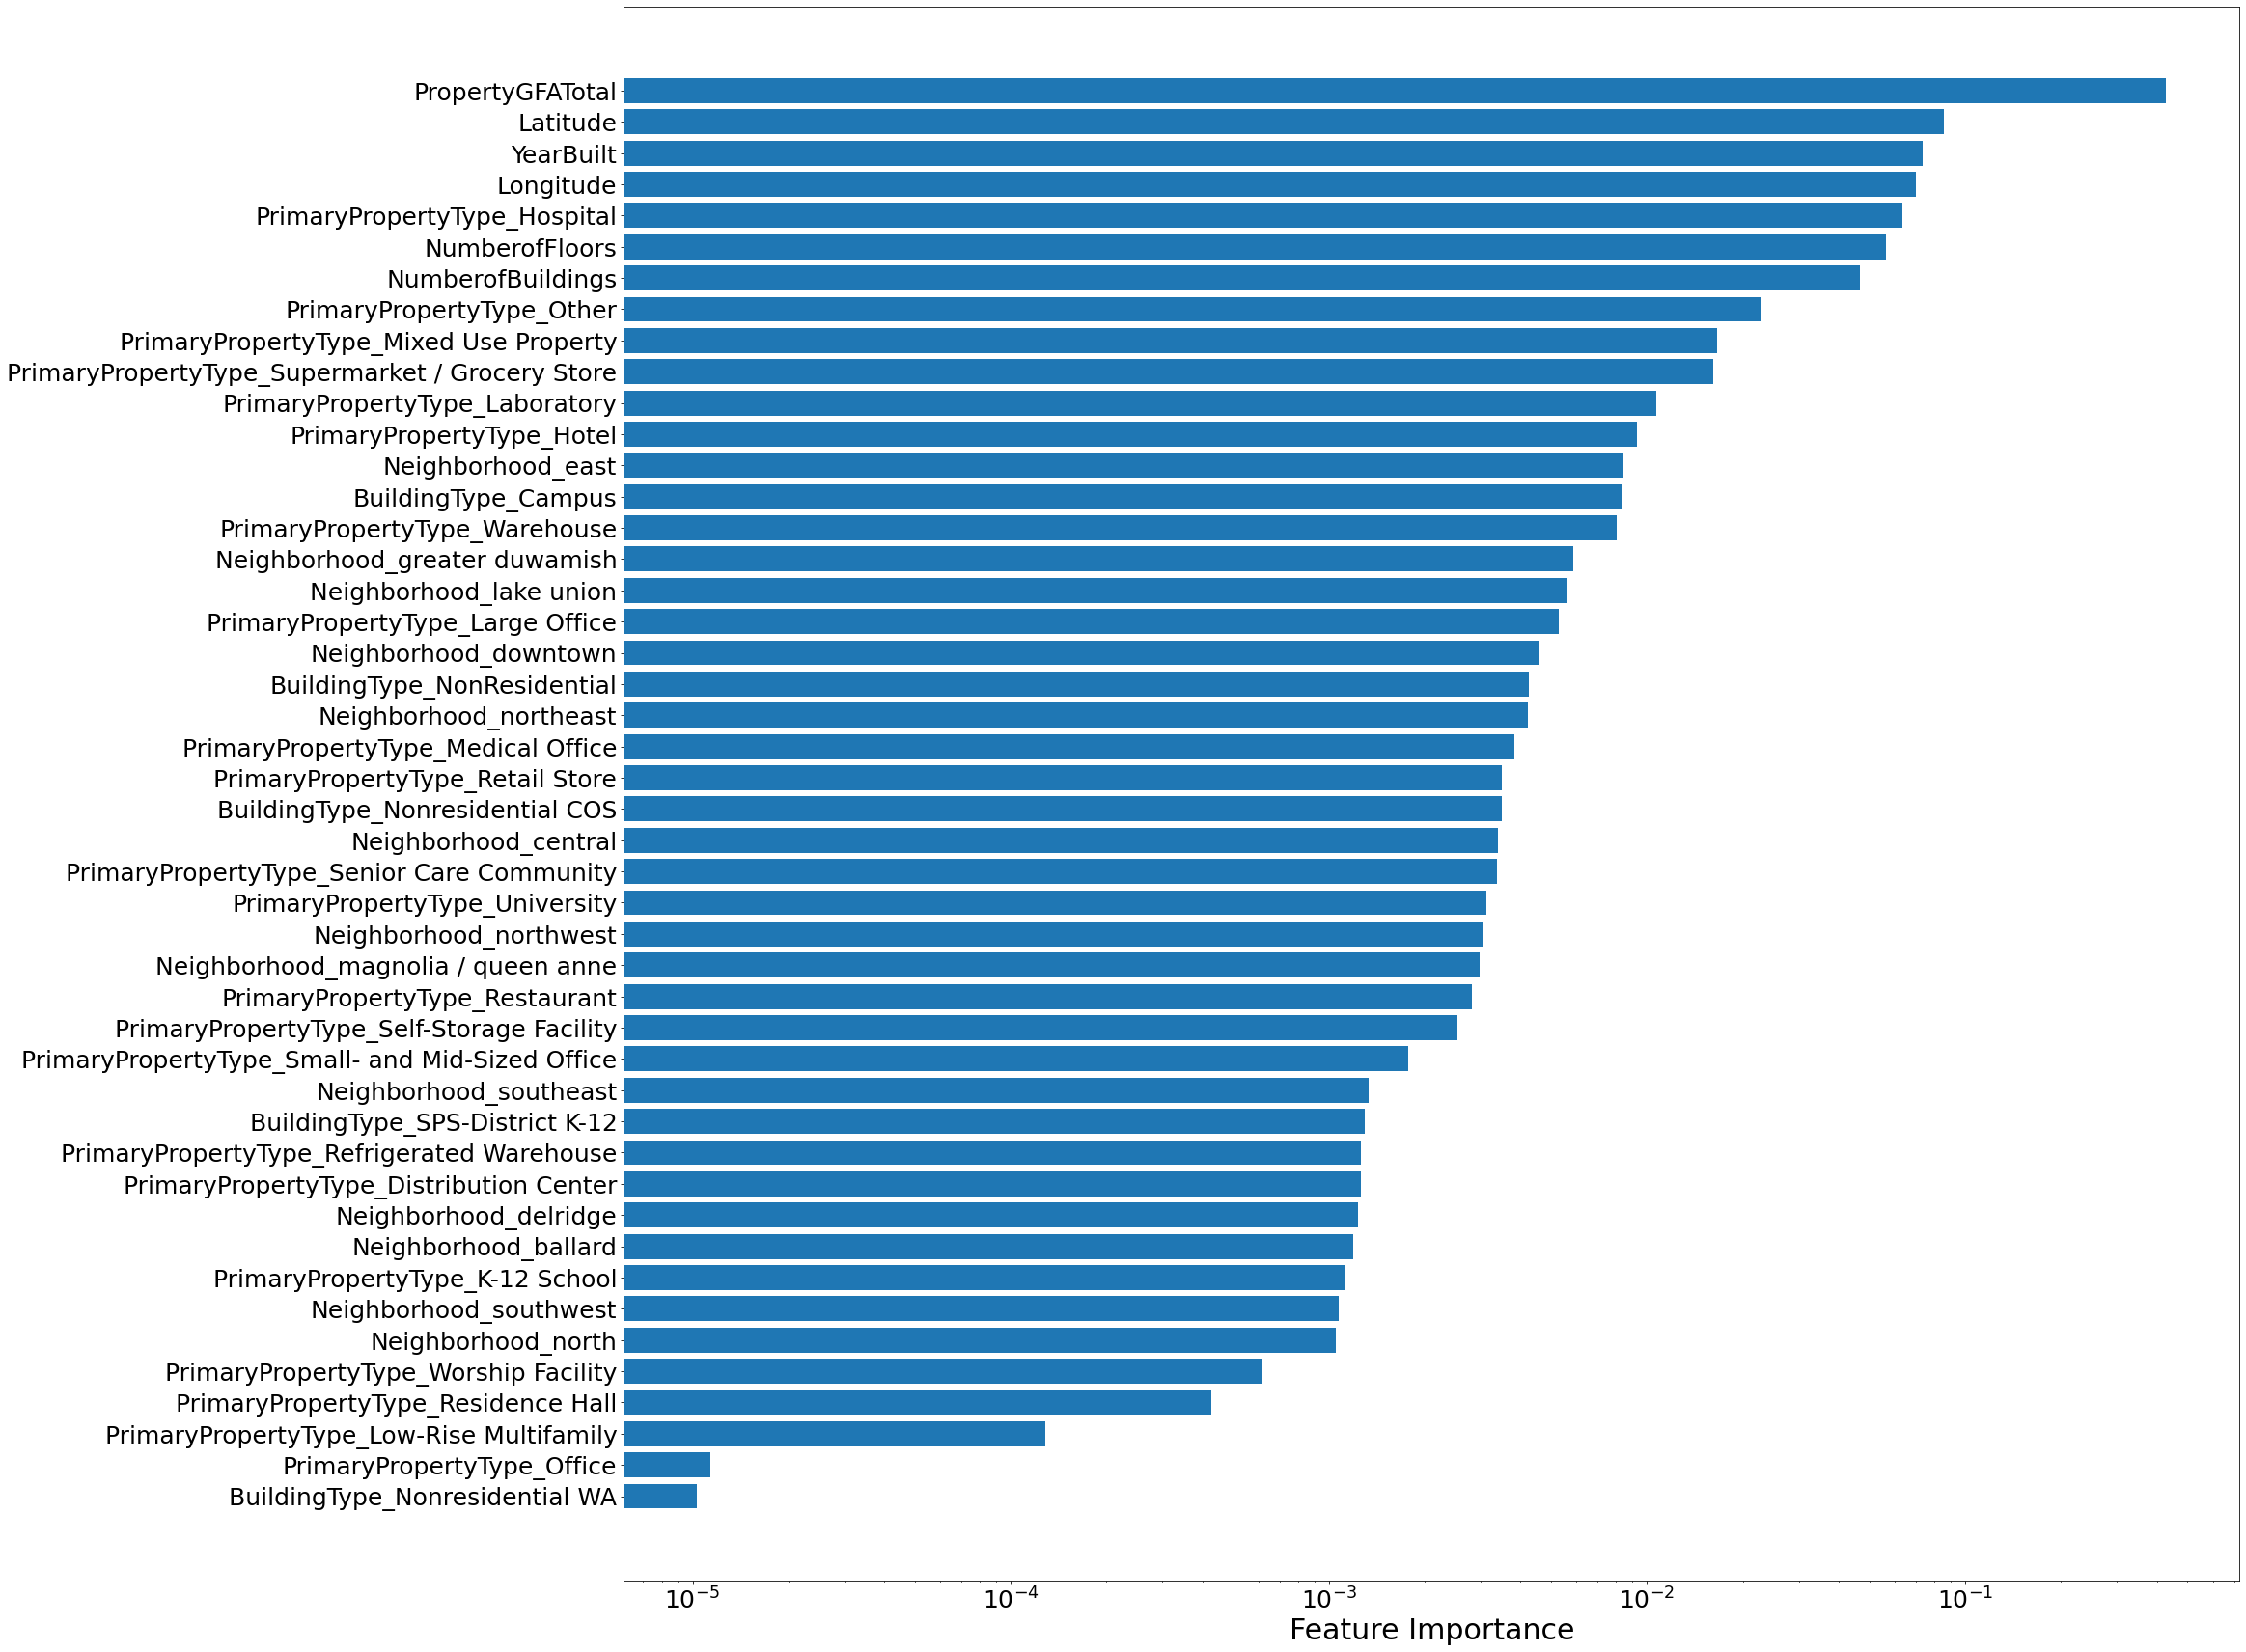

In [126]:
# feature importance
plt.figure(figsize=(30,30))
plt.yticks(
        rotation=0, 
        horizontalalignment='right',
        fontweight='light',
        fontsize=25 
)
plt.xscale('log')
plt.xticks(
        rotation=0, 
        fontweight='light',
        fontsize=25
)

sort = rfr2.feature_importances_.argsort()
figure = plt.barh(X2.columns[sort], rfr2.feature_importances_[sort])

plt.xlabel("Feature Importance", fontsize=30)


In [128]:
import numpy as np
max_features_range  = ['sqrt', 'log2']
max_depth_range = [10, 20, 30, 40, 50, 60, 70, 80]
min_samples_split_range = [2, 5, 10]
bootstrap_range = [True, False]
n_estimators_range = [800, 900, 1000, 1200]
min_samples_leaf_range = [1,2,4]

param_rfr2 = {'max_features' : max_features_range,
             'max_depth': max_depth_range,
             'min_samples_split': min_samples_split_range,
             'bootstrap' : bootstrap_range,
             'min_samples_leaf': min_samples_leaf_range,
             'n_estimators' : n_estimators_range
             }


In [129]:
from sklearn.model_selection import RandomizedSearchCV
score = 'neg_mean_absolute_error'

random_grid_pred2 = RandomizedSearchCV(RandomForestRegressor(criterion='absolute_error'),
        param_rfr2,
        cv=5,
        scoring=score)
                                    
random_grid_pred2.fit(X_train, y_train)


/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/Users/yixuanzhao/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y t

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='absolute_error',
                                                   max_depth=None,
                                                   max_features=1.0,
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                                                   n_jobs=None, oob_score=False,
                                                   random_state=N...
                   n_iter=10, n_jobs=None,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80],
                                        'max_features': ['sqrt', 'log2'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [800, 900, 1000, 1200]},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring='neg_mean_absolute_error',
                   verbose=0)

In [130]:
random_grid_pred2.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 50,
 'bootstrap': False}

In [131]:
best_random_grid = random_grid_pred2.best_estimator_
y_test_pred_randomcv = best_random_grid.predict(X_test)

mae_randomcv = mean_absolute_error(y_test, y_test_pred_randomcv)
mse_randomcv = mean_squared_error(y_test, y_test_pred_randomcv)
mape_randomcv = mean_absolute_percentage_error(y_test, y_test_pred_randomcv)
r2_randomcv = r2_score(y_test,y_test_pred_randomcv)

In [132]:
random_grid_pred2.best_estimator_

RandomForestRegressor(bootstrap=False, ccp_alpha=0.0,
                      criterion='absolute_error', max_depth=50,
                      max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_samples_leaf=2, min_samples_split=5,
                      min_weight_fraction_leaf=0.0, n_estimators=800,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [133]:
print("MAE_cv : " , mae_randomcv)
print("MSE_cv : ", mse_randomcv)
print("MAPE_cv : ", mape_randomcv)
print("R2_cv : ", r2_randomcv)


MAE_cv :  2992398.774339086
MSE_cv :  41769124329802.26
MAPE_cv :  1.1900587225652136e+20
R2_cv :  0.6445229481393852
